In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/gas_turbines (1).csv")

In [ ]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
X = df.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= df.loc[:,['TEY']]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

In [ ]:
import sklearn

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

<ipython-input-15-ae62adc6907d>:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.15 (0.11) MSE


In [ ]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.4020007 , -1.3661758 , -1.3709074 , ..., -0.46547523,
       -0.7829519 , -1.056588  ], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [ ]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)
prediction

array([ 0.01743319, -0.17549028,  0.7297011 , ..., -0.21104923,
       -1.854329  , -1.8250889 ], dtype=float32)

In [ ]:
X = df.drop(columns = ['TEY'], axis = 1)
y = df.iloc[:,7]
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 70)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.57218111, -0.64829171, -0.41196778, ...,  0.92028609,
        -0.13123791,  0.57638114],
       [-0.59462268, -1.28078244,  1.27962932, ..., -0.12319922,
        -0.13911923,  0.47355654],
       [ 0.52293888, -0.54030549,  0.54695705, ..., -0.32584444,
        -0.32779616, -0.5586799 ],
       ...,
       [ 0.5442684 , -1.55846129, -0.19318924, ..., -0.0342554 ,
        -0.42365392, -0.07545998],
       [-0.3206305 ,  1.9433776 ,  0.33006516, ..., -0.05534517,
        -0.20069799,  0.4201026 ],
       [ 0.77112497, -0.74085133,  0.57228167, ...,  0.07302736,
        -0.10308355, -0.47775657]])

In [ ]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([

                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)
                             ])


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 70
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/70
381/381 - 2s - loss: 2900.4089 - mean_squared_error: 2900.4089 - val_loss: 159.7395 - val_mean_squared_error: 159.7395 - 2s/epoch - 5ms/step
Epoch 2/70
381/381 - 1s - loss: 96.4571 - mean_squared_error: 96.4571 - val_loss: 65.8595 - val_mean_squared_error: 65.8595 - 796ms/epoch - 2ms/step
Epoch 3/70
381/381 - 1s - loss: 43.1646 - mean_squared_error: 43.1646 - val_loss: 33.4213 - val_mean_squared_error: 33.4213 - 716ms/epoch - 2ms/step
Epoch 4/70
381/381 - 1s - loss: 22.2742 - mean_squared_error: 22.2742 - val_loss: 16.6563 - val_mean_squared_error: 16.6563 - 957ms/epoch - 3ms/step
Epoch 5/70
381/381 - 1s - loss: 10.9981 - mean_squared_error: 10.9981 - val_loss: 7.2273 - val_mean_squared_error: 7.2273 - 726ms/epoch - 2ms/step
Epoch 6/70
381/381 - 1s - loss: 4.6855 - mean_squared_error: 4.6855 - val_loss: 2.7924 - val_mean_squared_error: 2.7924 - 708ms/epoch - 2ms/step
Epoch 7/70
381/381 - 1s - loss: 2.6374 - mean_squared_error: 2.6374 - val_loss: 2.5142 - val_mean_squared_err

In [ ]:
 model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.9905 - mean_squared_error: 0.9905


[0.9904664158821106, 0.9904664158821106]

In [ ]:
import matplotlib.pyplot as plt

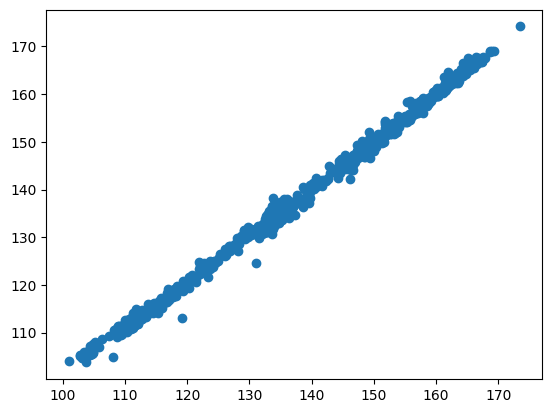

In [ ]:
predictions = model.predict_on_batch(X_test_scaled)
plt.scatter(y_test, predictions)

In [ ]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,147.32,147.240677,0.053844
1,133.75,134.976822,0.917250
2,128.11,129.333511,0.955048
3,134.37,135.782928,1.051521
4,144.96,144.857956,0.070395
...,...,...,...
1499,137.31,134.651901,1.935838
1500,148.97,149.377335,0.273434
1501,133.74,133.160965,0.432956
1502,134.20,132.933624,0.943648
